### Exploratory analysis

In [1]:
# We import the libraries to be used throughout the session
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# We connect to Google Drive (where the session files should be)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Load the dataset
df = pd.read_excel('/content/drive/My Drive/Máster/Inteligencia de Negocio/dataset_AW.xlsx')
print(df.head())
print("")
print(df.shape)

   SalesOrderID  OrderQty  UnitPrice  ProductID   Color  SafetyStockLevel  \
0         43659         1   2024.994        776   Black               100   
1         43659         3   2024.994        777   Black               100   
2         43659         1   2024.994        778   Black               100   
3         43659         1   2039.994        771  Silver               100   
4         43659         1   2039.994        772  Silver               100   

   ReorderPoint  StandardCost  ListPrice Size  Weight  DaysToManufacture  \
0            75     1898.0944    3374.99   42   20.77                  4   
1            75     1898.0944    3374.99   44   21.13                  4   
2            75     1898.0944    3374.99   48   21.42                  4   
3            75     1912.1544    3399.99   38   20.35                  4   
4            75     1912.1544    3399.99   42   20.77                  4   

             Name  
0  Mountain Bikes  
1  Mountain Bikes  
2  Mountain Bikes  


In [6]:
# We create a copy of the original dataset
df_original = df.copy()

In [7]:
# Summary of columns and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SalesOrderID       121317 non-null  int64  
 1   OrderQty           121317 non-null  int64  
 2   UnitPrice          121317 non-null  float64
 3   ProductID          121317 non-null  int64  
 4   Color              87172 non-null   object 
 5   SafetyStockLevel   121317 non-null  int64  
 6   ReorderPoint       121317 non-null  int64  
 7   StandardCost       121317 non-null  float64
 8   ListPrice          121317 non-null  float64
 9   Size               69735 non-null   object 
 10  Weight             54450 non-null   float64
 11  DaysToManufacture  121317 non-null  int64  
 12  Name               121317 non-null  object 
dtypes: float64(4), int64(6), object(3)
memory usage: 12.0+ MB
None


In [8]:
# We see information about the variables
df.describe()

,SalesOrderID,OrderQty,UnitPrice,ProductID,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Weight,DaysToManufacture
count,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,54450.000000,121317.000000
mean,57827.363782,2.266080,465.093496,841.680836,169.938162,127.453622,373.686117,633.673429,42.858309,1.486675
std,9009.147902,2.491323,751.885081,86.452124,205.181248,153.885936,554.114063,931.171197,121.818305,1.805957
min,43659.000000,1.000000,1.328200,707.000000,4.000000,3.000000,0.856500,2.290000,2.120000,0.000000
25%,49884.000000,1.000000,21.490000,768.000000,4.000000,3.000000,9.159300,24.490000,15.000000,0.000000
50%,57029.000000,1.000000,49.990000,863.000000,100.000000,75.000000,38.492300,63.500000,19.790000,0.000000
75%,65490.000000,3.000000,602.346000,921.000000,500.000000,375.000000,486.706600,782.990000,25.130000,4.000000
max,75123.000000,44.000000,3578.270000,999.000000,500.000000,375.000000,2171.294200,3578.270000,1050.000000,4.000000


In [9]:
# We check the null values
print(df.isnull().sum())

SalesOrderID             0
OrderQty                 0
UnitPrice                0
ProductID                0
Color                34145
SafetyStockLevel         0
ReorderPoint             0
StandardCost             0
ListPrice                0
Size                 51582
Weight               66867
DaysToManufacture        0
Name                     0
dtype: int64


In [10]:
# We eliminate the null values
df = df.dropna()
print(df.isnull().sum())

SalesOrderID         0
OrderQty             0
UnitPrice            0
ProductID            0
Color                0
SafetyStockLevel     0
ReorderPoint         0
StandardCost         0
ListPrice            0
Size                 0
Weight               0
DaysToManufacture    0
Name                 0
dtype: int64


In [11]:
# Let's see if there are duplicate values
print(df.duplicated().sum())

0


In [12]:
# Let's create new variables such as total revenue, total costs and total profits.
df['Total_Income'] = df['OrderQty']*df['ListPrice']
df['Total_Cost'] = df['OrderQty']*df['StandardCost']
df['Profit'] = df['Total_Income']-df['Total_Cost']

print(df.head(10))

    SalesOrderID  OrderQty  UnitPrice  ProductID   Color  SafetyStockLevel  \
0          43659         1  2024.9940        776   Black               100   
1          43659         3  2024.9940        777   Black               100   
2          43659         1  2024.9940        778   Black               100   
3          43659         1  2039.9940        771  Silver               100   
4          43659         1  2039.9940        772  Silver               100   
5          43659         2  2039.9940        773  Silver               100   
6          43659         1  2039.9940        774  Silver               100   
12         43660         1   419.4589        762     Red               100   
13         43660         1   874.7940        758     Red               100   
14         43661         1   809.7600        745   Black               500   

    ReorderPoint  StandardCost  ListPrice Size  Weight  DaysToManufacture  \
0             75     1898.0944    3374.99   42   20.77          

In [14]:
# Benefits Analysis by Color Category
Profit_by_color = df.groupby('Color')['Profit'].mean()
print("Benefits Analysis by Color Category:\n", Profit_by_color)

# Analysis of total sales by product identifier
total_sales_per_product = df.groupby('Name')['OrderQty'].sum()
print("Total sales by product identifier:\n", total_sales_per_product)

Benefits Analysis by Color Category:
 Color
Black     1368.923970
Blue      1189.866580
Red       1216.347582
Silver    1626.401055
Yellow    1082.594832
Name: Profit, dtype: float64
Total sales by product identifier:
 Name
Mountain Bikes     28321
Mountain Frames    11621
Road Bikes         47196
Road Frames        11753
Touring Bikes      14751
Touring Frames      3725
Name: OrderQty, dtype: int64


In [15]:
# Coding categorical variables
df_cod = pd.get_dummies(df, columns=['Name', 'Color'], drop_first=False)

In [16]:
df_cod.head(15)

,SalesOrderID,OrderQty,UnitPrice,ProductID,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,Weight,...,Name_Mountain Frames,Name_Road Bikes,Name_Road Frames,Name_Touring Bikes,Name_Touring Frames,Color_Black,Color_Blue,Color_Red,Color_Silver,Color_Yellow
0,43659,1,2024.9940,776,100,75,1898.0944,3374.99,42,20.77,...,False,False,False,False,False,True,False,False,False,False
1,43659,3,2024.9940,777,100,75,1898.0944,3374.99,44,21.13,...,False,False,False,False,False,True,False,False,False,False
2,43659,1,2024.9940,778,100,75,1898.0944,3374.99,48,21.42,...,False,False,False,False,False,True,False,False,False,False
3,43659,1,2039.9940,771,100,75,1912.1544,3399.99,38,20.35,...,False,False,False,False,False,False,False,False,True,False
4,43659,1,2039.9940,772,100,75,1912.1544,3399.99,42,20.77,...,False,False,False,False,False,False,False,False,True,False
5,43659,2,2039.9940,773,100,75,1912.1544,3399.99,44,21.13,...,False,False,False,False,False,False,False,False,True,False
6,43659,1,2039.9940,774,100,75,1912.1544,3399.99,48,21.42,...,False,False,False,False,False,False,False,False,True,False
12,43660,1,419.4589,762,100,75,486.7066,782.99,44,18.77,...,False,True,False,False,False,False,False,True,False,False
13,43660,1,874.7940,758,100,75,884.7083,1457.99,52,17.42,...,False,True,False,False,False,False,False,True,False,False
14,43661,1,809.7600,745,500,375,699.0928,1349.60,48,2.80,...,True,False,False,False,False,True,False,False,False,False


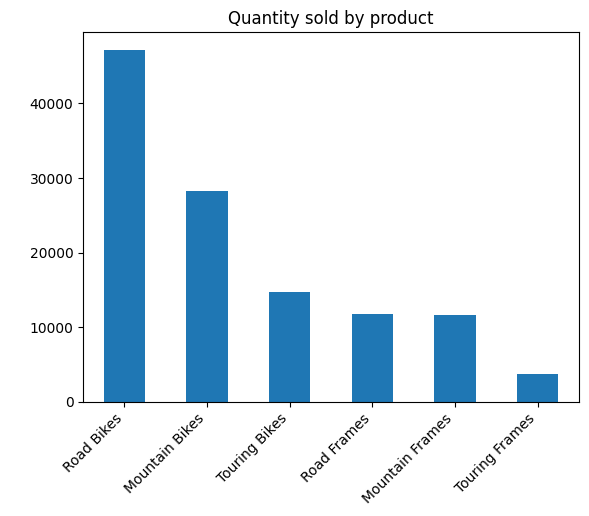

Name
Road Bikes         47196
Mountain Bikes     28321
Touring Bikes      14751
Road Frames        11753
Mountain Frames    11621
Touring Frames      3725
Name: OrderQty, dtype: int64


In [17]:
# We will begin to make graphical representations that make it easier for us to visualize data
# We will represent the best-selling products
# Bar chart: Quantities sold by product
df.groupby('Name')['OrderQty'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Quantity sold by product')
plt.xlabel('')
plt.ylabel(' ')
plt.xticks(rotation=45, ha='right')
plt.show()
print(df.groupby('Name')['OrderQty'].sum().sort_values(ascending=False))

In [18]:
# We configure pandas to display numbers without scientific notation

pd.options.display.float_format = '{:.2f}'.format

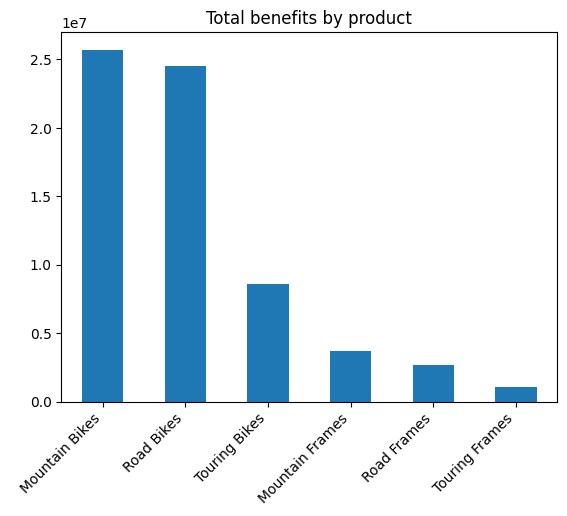

Name
Mountain Bikes    25704700.75
Road Bikes        24521805.33
Touring Bikes      8570621.73
Mountain Frames    3722207.39
Road Frames        2711881.03
Touring Frames     1101349.93
Name: Profit, dtype: float64


In [19]:
# Let's make a graph of the units sold by product
df.groupby('Name')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total benefits by product')
plt.xlabel('')
plt.ylabel(' ')
plt.xticks(rotation=45, ha='right')
plt.show()
print(df.groupby('Name')['Profit'].sum().sort_values(ascending=False))



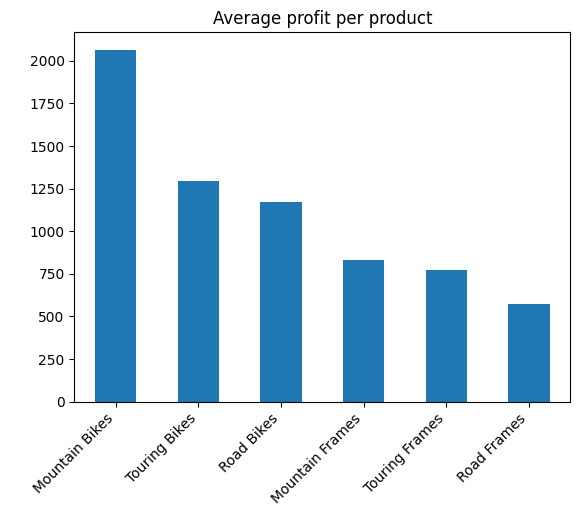

In [20]:
# Average profit per product
df.groupby('Name')['Profit'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Average profit per product')
plt.xlabel('')
plt.ylabel(' ')
plt.show()


We observe that the average profits per product are more even than the total profits per product, this is explained by the differences in quantities sold.

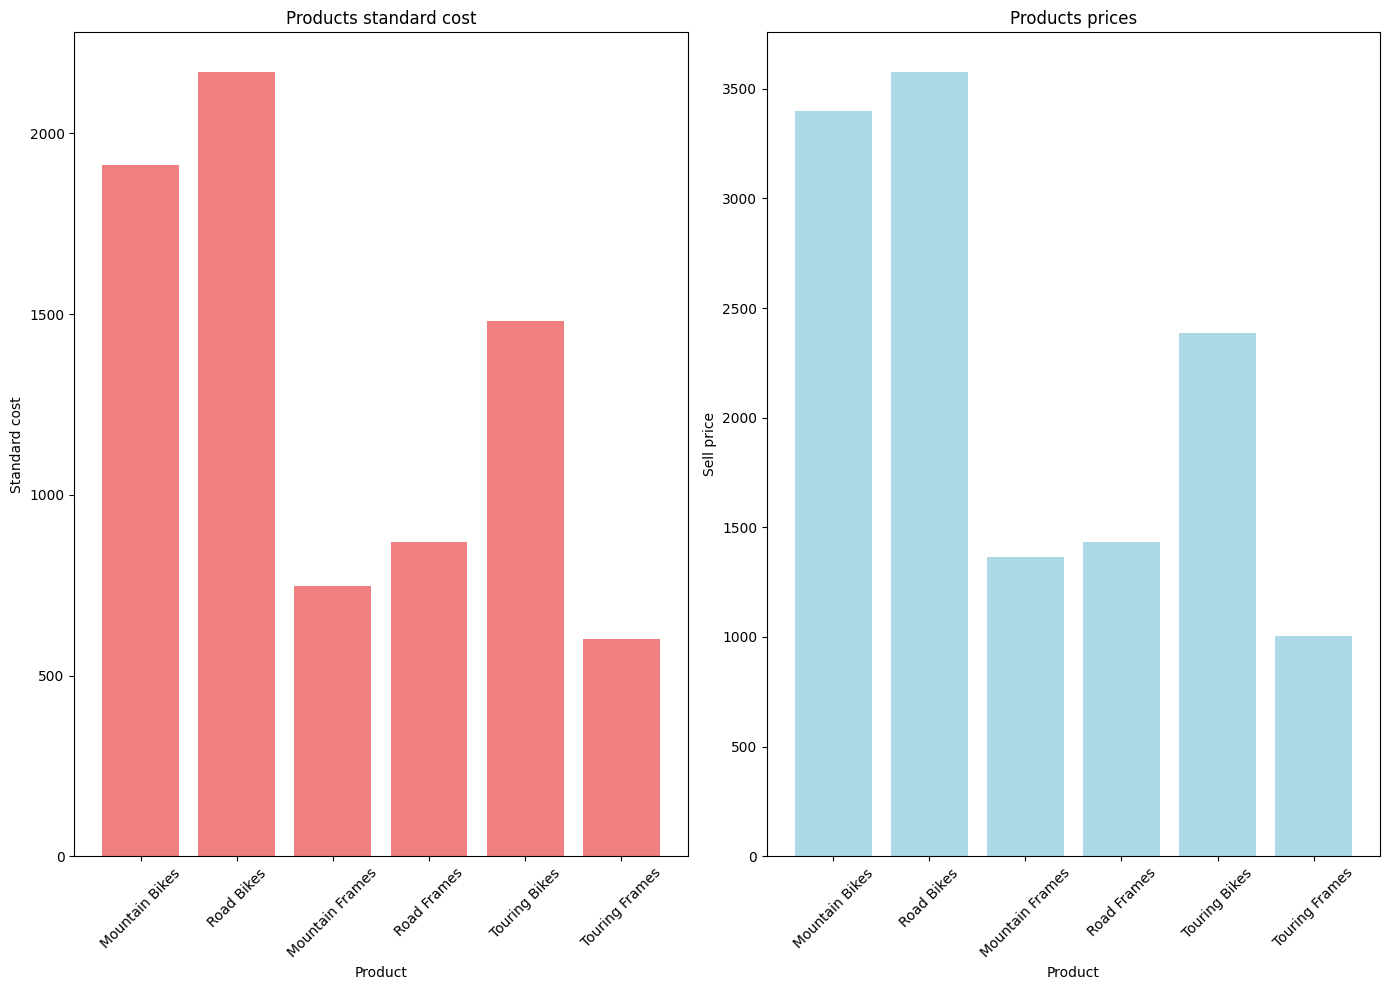

In [22]:
from os import name

# Let's see which products have a higher cost, a higher selling price and profit per unit
# Create a figure with 2 subgraphs (1x2)
fig, axes = plt.subplots(1, 2, figsize=(14, 10))



# Subgraph 1: Cost per product
axes[0].bar(df['Name'], df['StandardCost'], color='lightcoral')
axes[0].set_title('Products standard cost')
axes[0].set_xlabel('Product')
axes[0].set_ylabel('Standard cost')

# Subgraph 2: Sales price by product
axes[1].bar(df['Name'], df['ListPrice'], color='lightblue')
axes[1].set_title('Products prices')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Sell price')


# Rotate X-axis labels
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()

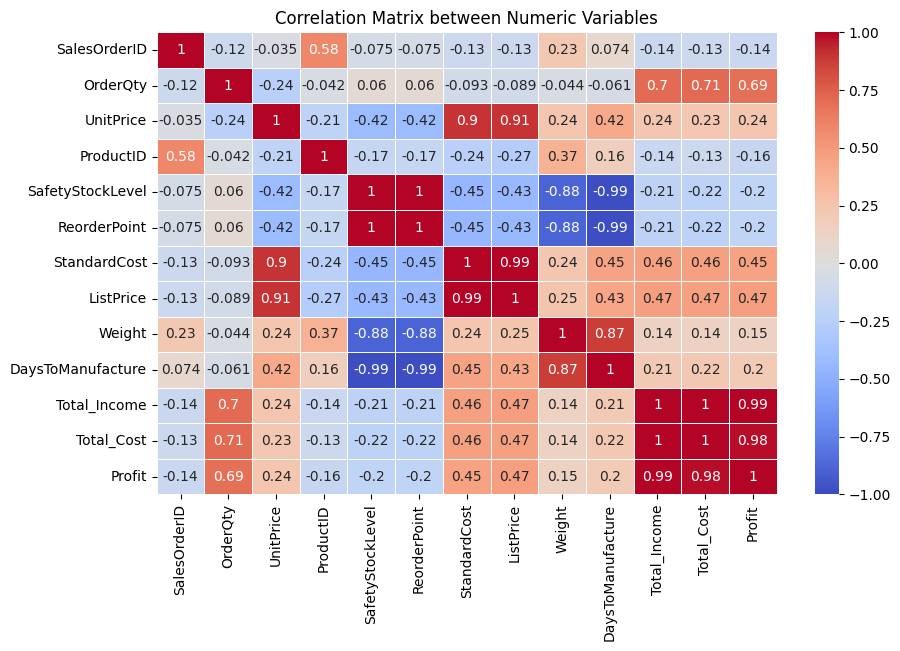

In [23]:
# Filter out only numeric columns
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix with only numeric variables
correlation_matrix = df_numerico.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='white')

# Add title
plt.title('Correlation Matrix between Numeric Variables')

# Display the graph
plt.show()

We can see that there are variables with a very high positive correlation, such as the standard cost and the listed price with the price per unit of the product, this makes perfect sense since if the cost of a product increases, its price will increase in order to make a profit, other related variables are the weight of the product and the number of days it takes to manufacture, the variables of total costs, total income and total profits are also positively related

Some of the variables that have a strong negative correlation are the weight and the days it takes to manufacture a product with the level of inventory considered safe and the level at which a new order is placed, this may be related to the fact that the heaviest products are not the most sold and therefore have more margin in terms of inventory and ordering new products.

### Clustering


In [24]:
from sklearn.cluster import KMeans

In [25]:
# Select the features for clustering
X = df[['OrderQty', 'ListPrice', 'StandardCost', 'Profit']]
print(X.head())

   OrderQty  ListPrice  StandardCost  Profit
0         1    3374.99       1898.09 1476.90
1         3    3374.99       1898.09 4430.69
2         1    3374.99       1898.09 1476.90
3         1    3399.99       1912.15 1487.84
4         1    3399.99       1912.15 1487.84


In [26]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

# Scaled with MinMaxScaler
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X)

# Show the transformation
print("Datos escalados con MinMaxScaler:")
print(X_scaled_minmax[:5])

Datos escalados con MinMaxScaler:
[[0.         0.93892708 0.8657171  0.05842968]
 [0.06896552 0.93892708 0.8657171  0.1849714 ]
 [0.         0.93892708 0.8657171  0.05842968]
 [0.         0.94643801 0.87262786 0.05889835]
 [0.         0.94643801 0.87262786 0.05889835]]


In [27]:
# We added the variable names for clarity
X_scaled_minmax_df = pd.DataFrame(X_scaled_minmax, columns=['OrderQty', 'ListPrice', 'StandardCost', 'Profit'])
print("\nCentroids with variable names:\n", X_scaled_minmax_df)


Centroids with variable names:
        OrderQty  ListPrice  StandardCost  Profit
0          0.00       0.94          0.87    0.06
1          0.07       0.94          0.87    0.18
2          0.00       0.94          0.87    0.06
3          0.00       0.95          0.87    0.06
4          0.00       0.95          0.87    0.06
...         ...        ...           ...     ...
50644      0.00       0.09          0.10    0.00
50645      0.00       0.64          0.66    0.03
50646      0.00       0.64          0.66    0.03
50647      0.00       0.09          0.10    0.00
50648      0.00       0.09          0.10    0.00

[50649 rows x 4 columns]


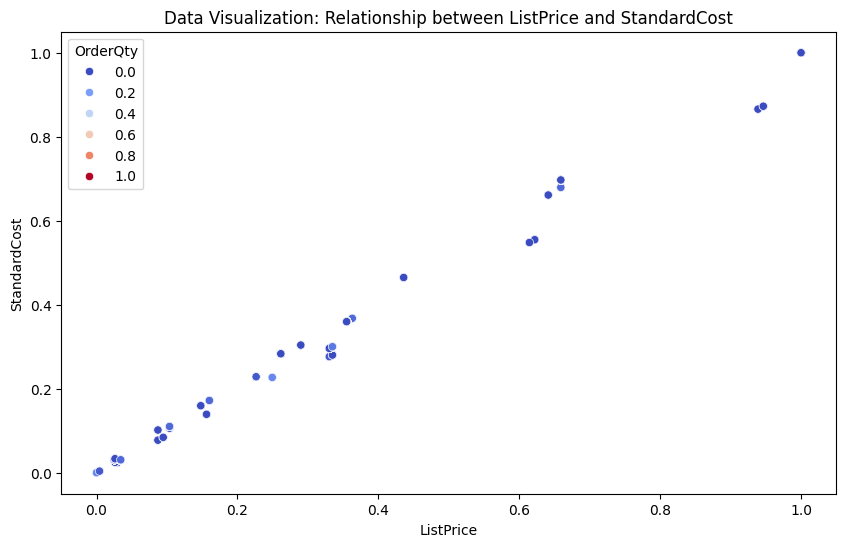

In [29]:
plt.figure(figsize=(10, 6))
# Use the DataFrame X_scaled_minmax_df created earlier for plotting:
sns.scatterplot(x='ListPrice', y='StandardCost', data=X_scaled_minmax_df, hue='OrderQty', palette='coolwarm')
plt.title('Data Visualization: Relationship between ListPrice and StandardCost')
plt.show()


In [30]:
# Create a copy
df_analisis = df.copy()

In [31]:
ListaVariablesAnalisis = ['OrderQty', 'ListPrice', 'StandardCost', 'Profit']
df_seleccion = df_analisis[ListaVariablesAnalisis]
df_seleccion.head()

,OrderQty,ListPrice,StandardCost,Profit
0,1,3374.99,1898.09,1476.90
1,3,3374.99,1898.09,4430.69
2,1,3374.99,1898.09,1476.90
3,1,3399.99,1912.15,1487.84
4,1,3399.99,1912.15,1487.84


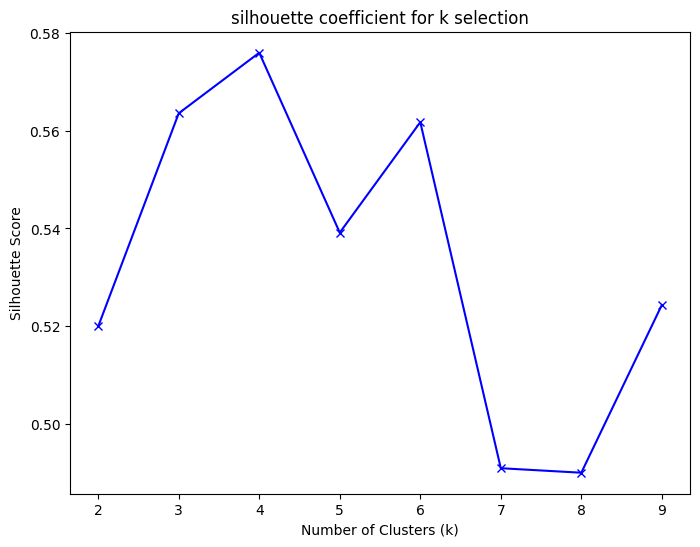

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# We calculate the silhouette coefficient for different values ​​of K
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_seleccion)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Visualize the silhouette coefficient
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('silhouette coefficient for k selection')
plt.show()

In [33]:
# We initialize the K-means model with 4 clusters
kmeans = KMeans(n_clusters= 4, random_state=42)
kmeans.fit(df_seleccion)

KMeans(n_clusters=4, random_state=42)

In [34]:
# We get the labels of the clusters
df_analisis['cluster'] = kmeans.labels_
# We make sure that the 'Cluster' column is of category or integer type
df_analisis['cluster'] = df_analisis['cluster'].astype('category')
# We show the first records of the Dataset with cluster assignment
print(df_analisis.head())


   SalesOrderID  OrderQty  UnitPrice  ProductID   Color  SafetyStockLevel  \
0         43659         1    2024.99        776   Black               100   
1         43659         3    2024.99        777   Black               100   
2         43659         1    2024.99        778   Black               100   
3         43659         1    2039.99        771  Silver               100   
4         43659         1    2039.99        772  Silver               100   

   ReorderPoint  StandardCost  ListPrice Size  Weight  DaysToManufacture  \
0            75       1898.09    3374.99   42   20.77                  4   
1            75       1898.09    3374.99   44   21.13                  4   
2            75       1898.09    3374.99   48   21.42                  4   
3            75       1912.15    3399.99   38   20.35                  4   
4            75       1912.15    3399.99   42   20.77                  4   

             Name  Total_Income  Total_Cost  Profit cluster  
0  Mountain Bikes 

<ipython-input-35-0e0b7e3cbd48>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_clusters.index, y=conteo_clusters.values, palette='viridis')


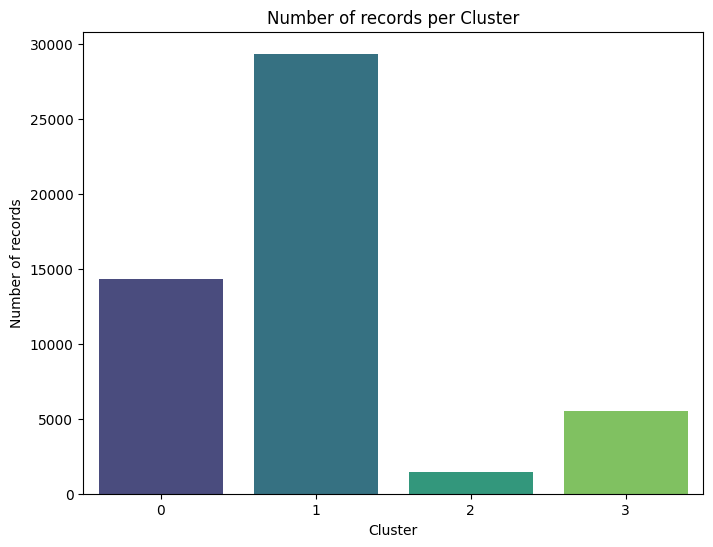

In [35]:
# We count the number of records per cluster
conteo_clusters = df_analisis['cluster'].value_counts()

# We plot a bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_clusters.index, y=conteo_clusters.values, palette='viridis')

# Chart settings
plt.title('Number of records per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of records')
plt.show()

In [36]:
# We show the centroids of the clusters
centroids = kmeans.cluster_centers_
print("Centroides de los clusters:\n", centroids)

Centroides de los clusters:
 [[1.18747382e+00 2.48152851e+03 1.47499512e+03 1.16505252e+03]
 [2.20319744e+00 7.66281588e+02 4.61000441e+02 6.41037165e+02]
 [7.38068966e+00 2.71092772e+03 1.55086617e+03 8.03084276e+03]
 [4.51633279e+00 2.19113568e+03 1.29230678e+03 3.46444608e+03]]


In [38]:
# We added the variable names for clarity
centroides_df = pd.DataFrame(centroids, columns=['OrderQty', 'ListPrice', 'StandardCost', 'Profit'])
print("\nCentroids with variable names:\n", centroides_df)


Centroids with variable names:
    OrderQty  ListPrice  StandardCost  Profit
0      1.19    2481.53       1475.00 1165.05
1      2.20     766.28        461.00  641.04
2      7.38    2710.93       1550.87 8030.84
3      4.52    2191.14       1292.31 3464.45


In [39]:
# Filter only numeric columns
df_numerico = df_analisis.select_dtypes(include=['float64', 'int64'])

# Group by 'cluster' and calculate the mean only on numeric columns
medias_por_cluster = df_numerico.groupby(df_analisis['cluster']).mean()

# Display the results
print(medias_por_cluster)

         SalesOrderID  OrderQty  UnitPrice  ProductID  SafetyStockLevel  \
cluster                                                                   
0            55807.53      1.19    2117.46     828.99            100.00   
1            54750.87      2.20     505.26     849.34            237.67   
2            50852.33      7.38    1538.41     804.85            101.38   
3            52594.51      4.52    1257.54     815.10            137.25   

         ReorderPoint  StandardCost  ListPrice  Weight  DaysToManufacture  \
cluster                                                                     
0               75.00       1475.00    2481.53   20.04               4.00   
1              178.26        461.00     766.28   15.67               3.02   
2               76.03       1550.87    2710.93   21.44               3.99   
3              102.94       1292.31    2191.14   18.85               3.75   

         Total_Income  Total_Cost  Profit  
cluster                                   

<ipython-input-39-78cec7708981>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias_por_cluster = df_numerico.groupby(df_analisis['cluster']).mean()


In [40]:

# We get the names of the DataFrame columns as a list
lista_columnas = list(df_analisis.columns)

# We show the list of columns
print(lista_columnas)

['SalesOrderID', 'OrderQty', 'UnitPrice', 'ProductID', 'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size', 'Weight', 'DaysToManufacture', 'Name', 'Total_Income', 'Total_Cost', 'Profit', 'cluster']


In [42]:
# Select Variables to display
V1=1
Variable1 = lista_columnas[V1]
print(Variable1)
V2=13
Variable2 = lista_columnas[V2]
print(Variable2)

OrderQty
Total_Income


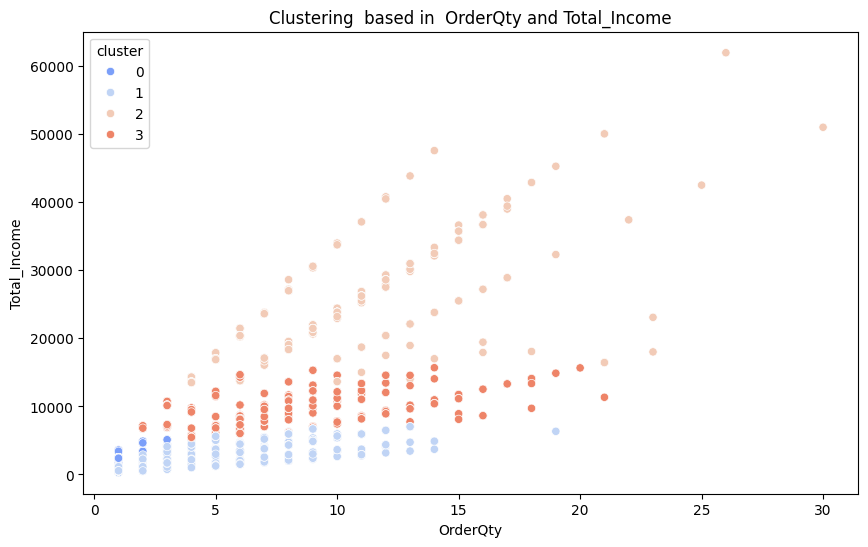

In [43]:
# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Variable1, y=Variable2, hue='cluster', data=df_analisis, palette='coolwarm')
plt.title(f'Clustering  based in  {Variable1} and {Variable2}')
plt.show()

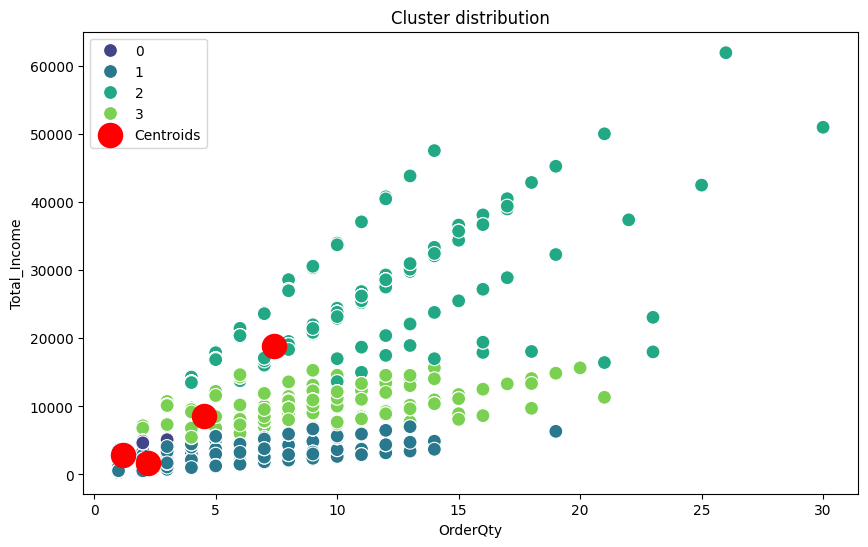

In [45]:
# We graph the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_analisis.iloc[:, V1], y=df_analisis.iloc[:, V2], hue='cluster', palette='viridis', data=df_analisis, s=100)


plt.scatter(medias_por_cluster[Variable1], medias_por_cluster[Variable2], s=300, c='red', label='Centroids')

# We graph the clusters
plt.title('Cluster distribution')
plt.xlabel(Variable1)
plt.ylabel(Variable2)
plt.legend()
plt.show()